In [48]:
import pandas as pd
import numpy as np

In [49]:
df = pd.read_csv("upsampled_tax_dataset.csv")
df.head()

,age,annual_income,employment_type,investment_horizon,risk_tolerance_score,financial_goal,dependents,tax_bracket,preferred_liquidity,investment_knowledge,recommended_product,recommended_product_full
0,46,393761,Salaried,19,9,Wealth Creation,3,<5L,Low,Intermediate,ELSS,Equity Linked Savings Scheme
1,59,590859,Salaried,4,1,Emergency,1,5–10L,Medium,Intermediate,NPS,National Pension System
2,24,457438,Salaried,17,8,Tax Saving,2,<5L,High,Beginner,ELSS,Equity Linked Savings Scheme
3,56,896910,Self-employed,8,9,Retirement,2,5–10L,Medium,Intermediate,ELSS,Equity Linked Savings Scheme
4,43,2064463,Retired,9,2,Emergency,1,>15L,High,Intermediate,NSC,National Savings Certificate


In [50]:
df.tail()

,age,annual_income,employment_type,investment_horizon,risk_tolerance_score,financial_goal,dependents,tax_bracket,preferred_liquidity,investment_knowledge,recommended_product,recommended_product_full
34315,49,1528489,Self-employed,4,3,Wealth Creation,3,>15L,Medium,Beginner,NSC,National Savings Certificate
34316,52,1534543,Self-employed,2,9,Wealth Creation,2,>15L,Medium,Beginner,Combo,Mixed Investment Portfolio
34317,53,2420811,Student,2,10,Tax Saving,3,>15L,High,Expert,Combo,Mixed Investment Portfolio
34318,42,1122317,Salaried,13,7,Retirement,2,10–15L,Low,Beginner,ELSS,Equity Linked Savings Scheme
34319,47,2346282,Self-employed,18,1,Wealth Creation,0,>15L,High,Beginner,NSC,National Savings Certificate


In [51]:
df.isnull().sum()

age                         0
annual_income               0
employment_type             0
investment_horizon          0
risk_tolerance_score        0
financial_goal              0
dependents                  0
tax_bracket                 0
preferred_liquidity         0
investment_knowledge        0
recommended_product         0
recommended_product_full    0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34320 entries, 0 to 34319
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       34320 non-null  int64 
 1   annual_income             34320 non-null  int64 
 2   employment_type           34320 non-null  object
 3   investment_horizon        34320 non-null  int64 
 4   risk_tolerance_score      34320 non-null  int64 
 5   financial_goal            34320 non-null  object
 6   dependents                34320 non-null  int64 
 7   tax_bracket               34320 non-null  object
 8   preferred_liquidity       34320 non-null  object
 9   investment_knowledge      34320 non-null  object
 10  recommended_product       34320 non-null  object
 11  recommended_product_full  34320 non-null  object
dtypes: int64(5), object(7)
memory usage: 3.1+ MB


In [53]:
df.describe()

,age,annual_income,investment_horizon,risk_tolerance_score,dependents
count,34320.000000,3.432000e+04,34320.000000,34320.000000,34320.000000
mean,40.147727,1.389834e+06,12.476340,4.510606,1.496911
std,10.932704,6.374339e+05,7.078261,2.625249,1.118228
min,22.000000,3.000560e+05,1.000000,1.000000,0.000000
25%,31.000000,8.404795e+05,6.000000,2.000000,0.000000
50%,40.000000,1.376829e+06,13.000000,4.000000,1.000000
75%,50.000000,1.935236e+06,19.000000,6.000000,2.000000
max,59.000000,2.499928e+06,24.000000,10.000000,3.000000


In [54]:
df.shape

(34320, 12)

In [55]:
print("\n Data Types:\n")
print(df.dtypes)


 Data Types:

age                          int64
annual_income                int64
employment_type             object
investment_horizon           int64
risk_tolerance_score         int64
financial_goal              object
dependents                   int64
tax_bracket                 object
preferred_liquidity         object
investment_knowledge        object
recommended_product         object
recommended_product_full    object
dtype: object


In [56]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col} → {df[col].unique()}")

employment_type → ['Salaried' 'Self-employed' 'Retired' 'Student']
financial_goal → ['Wealth Creation' 'Emergency' 'Tax Saving' 'Retirement' 'Child Education']
tax_bracket → ['<5L' '5–10L' '>15L' '10–15L']
preferred_liquidity → ['Low' 'Medium' 'High']
investment_knowledge → ['Intermediate' 'Beginner' 'Expert']
recommended_product → ['ELSS' 'NPS' 'NSC' 'Combo' 'SSY' 'PPF']
recommended_product_full → ['Equity Linked Savings Scheme' 'National Pension System'
 'National Savings Certificate' 'Mixed Investment Portfolio'
 'Sukanya Samriddhi Yojana' 'Public Provident Fund']


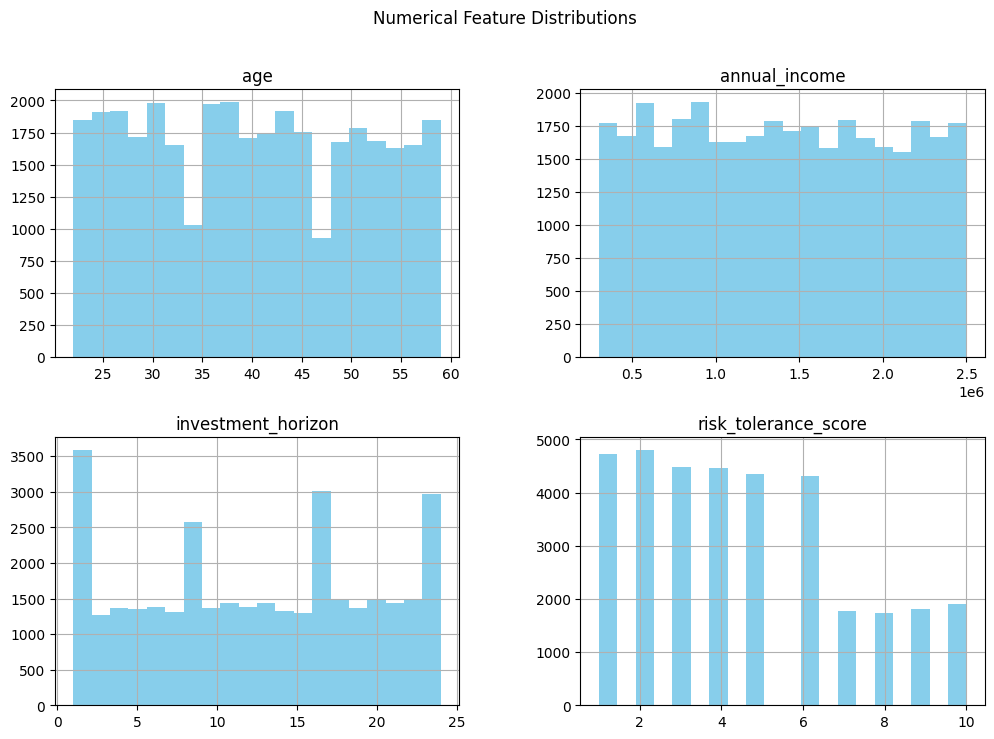

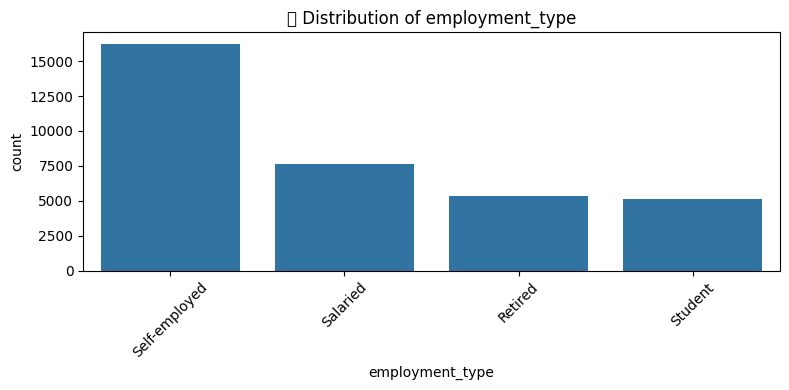

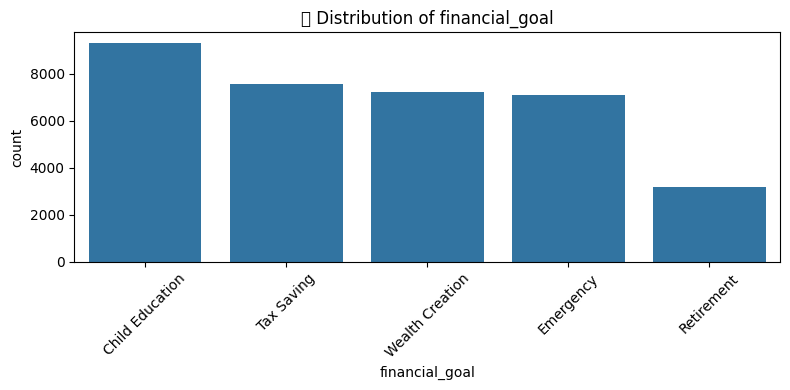

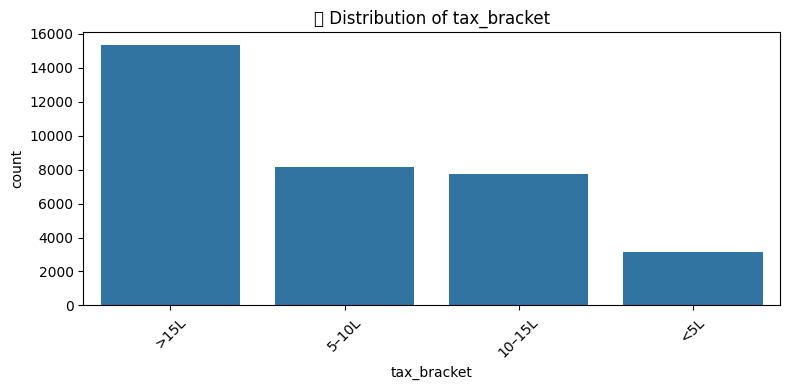

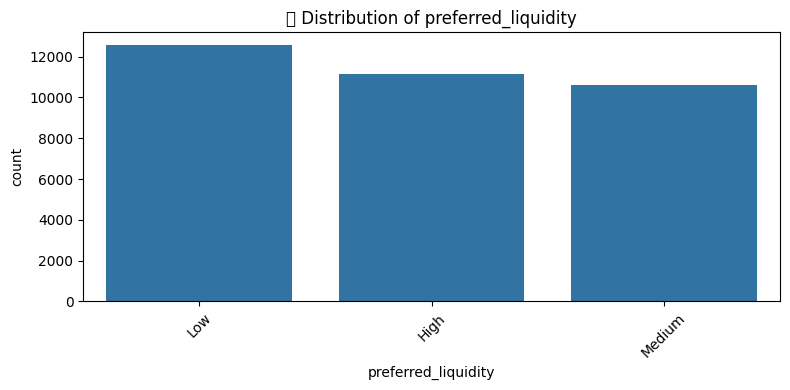

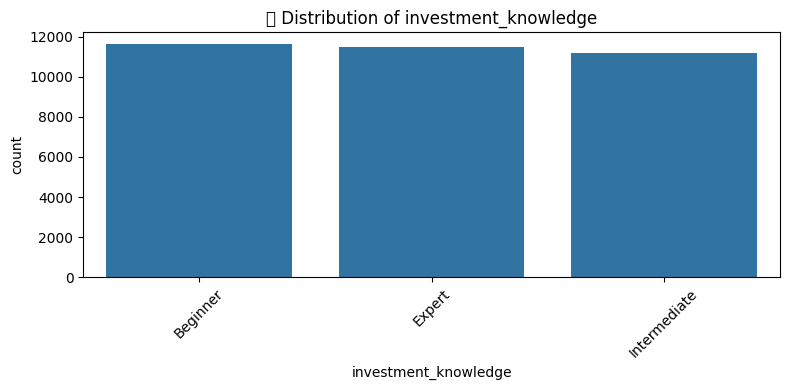

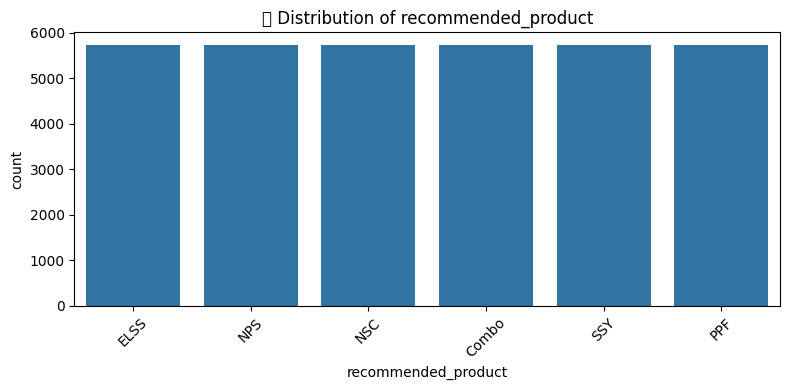

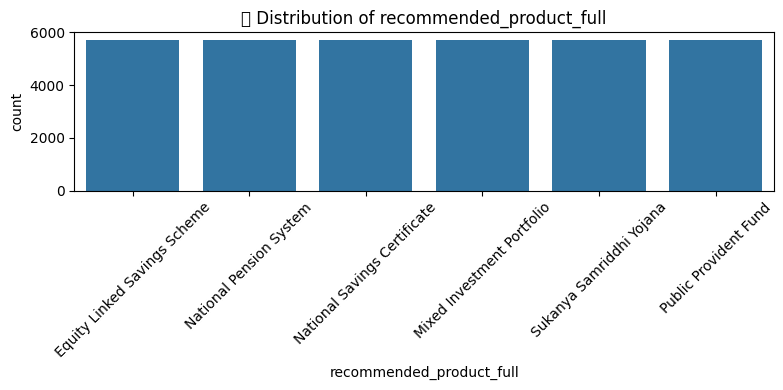

In [57]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

# Numerical
num_cols = ['age', 'annual_income', 'investment_horizon', 'risk_tolerance_score']
df[num_cols].hist(bins=20, figsize=(12, 8), color='skyblue')
plt.suptitle("Numerical Feature Distributions")
plt.show()

# Categorical
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"🔸 Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

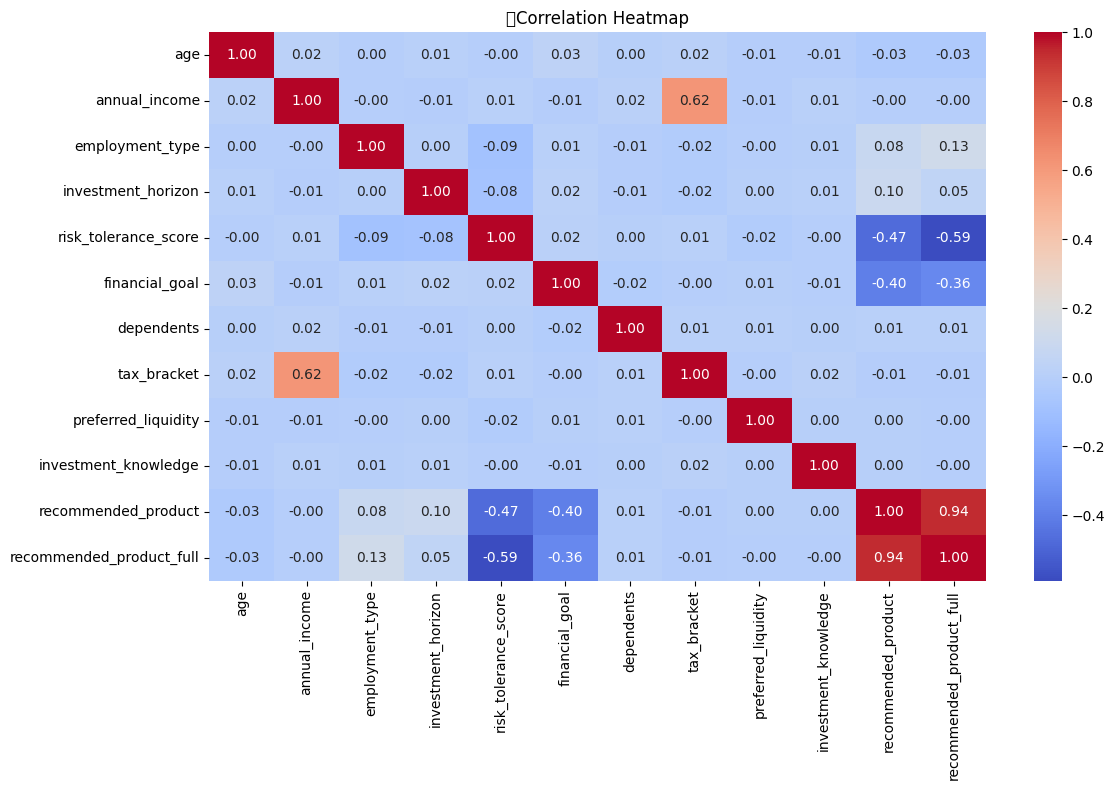

In [58]:
# Encode categorical to numeric
df_encoded = df.copy()
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("🔥Correlation Heatmap")
plt.tight_layout()
plt.show()

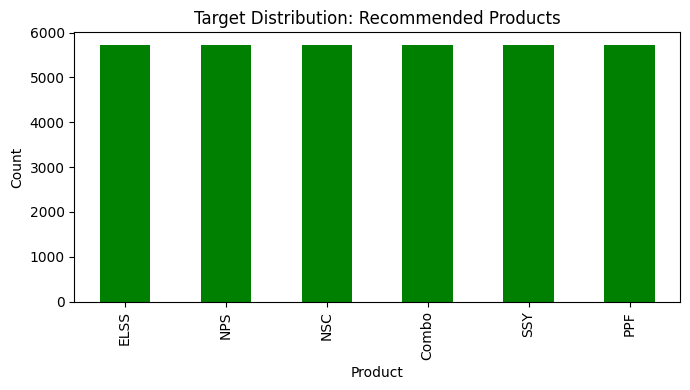

In [59]:
df['recommended_product'].value_counts().plot(kind='bar', figsize=(7, 4), color='green')
plt.title("Target Distribution: Recommended Products")
plt.xlabel("Product")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [60]:
df = df.drop(labels=['preferred_liquidity','dependents','recommended_product'],axis=1)
df

,age,annual_income,employment_type,investment_horizon,risk_tolerance_score,financial_goal,tax_bracket,investment_knowledge,recommended_product_full
0,46,393761,Salaried,19,9,Wealth Creation,<5L,Intermediate,Equity Linked Savings Scheme
1,59,590859,Salaried,4,1,Emergency,5–10L,Intermediate,National Pension System
2,24,457438,Salaried,17,8,Tax Saving,<5L,Beginner,Equity Linked Savings Scheme
3,56,896910,Self-employed,8,9,Retirement,5–10L,Intermediate,Equity Linked Savings Scheme
4,43,2064463,Retired,9,2,Emergency,>15L,Intermediate,National Savings Certificate
...,...,...,...,...,...,...,...,...,...
34315,49,1528489,Self-employed,4,3,Wealth Creation,>15L,Beginner,National Savings Certificate
34316,52,1534543,Self-employed,2,9,Wealth Creation,>15L,Beginner,Mixed Investment Portfolio
34317,53,2420811,Student,2,10,Tax Saving,>15L,Expert,Mixed Investment Portfolio
34318,42,1122317,Salaried,13,7,Retirement,10–15L,Beginner,Equity Linked Savings Scheme


In [61]:
x = df.drop(labels=['recommended_product_full'],axis=1)
y = df[['recommended_product_full']]


In [62]:
y

,recommended_product_full
0,Equity Linked Savings Scheme
1,National Pension System
2,Equity Linked Savings Scheme
3,Equity Linked Savings Scheme
4,National Savings Certificate
...,...
34315,National Savings Certificate
34316,Mixed Investment Portfolio
34317,Mixed Investment Portfolio
34318,Equity Linked Savings Scheme


In [63]:
# Selecting categorical columns (object type)
categorical_cols = x.select_dtypes(include='object').columns
categorical_cols

Index(['employment_type', 'financial_goal', 'tax_bracket',
       'investment_knowledge'],
      dtype='object')

In [64]:
# Selecting numerical columns (excluding object type)
numerical_cols = x.select_dtypes(exclude='object').columns
numerical_cols

Index(['age', 'annual_income', 'investment_horizon', 'risk_tolerance_score'], dtype='object')

In [65]:
x.select_dtypes(include='object')

,employment_type,financial_goal,tax_bracket,investment_knowledge
0,Salaried,Wealth Creation,<5L,Intermediate
1,Salaried,Emergency,5–10L,Intermediate
2,Salaried,Tax Saving,<5L,Beginner
3,Self-employed,Retirement,5–10L,Intermediate
4,Retired,Emergency,>15L,Intermediate
...,...,...,...,...
34315,Self-employed,Wealth Creation,>15L,Beginner
34316,Self-employed,Wealth Creation,>15L,Beginner
34317,Student,Tax Saving,>15L,Expert
34318,Salaried,Retirement,10–15L,Beginner


In [66]:
# Define custom ranking for ordinal variables
employment_type_categories = ['Salaried','Student','Self-employed','Retired']
financial_goal_categories = ['Wealth Creation','Tax Saving','Child Education','Emergency','Retirement']  
tax_bracket_categories = ['>15L','<5L','5–10L','10–15L']
investment_knowledge_categories = ['Intermediate','Beginner','Expert']

In [67]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor

In [68]:
num_pipeline=Pipeline(

    steps=[

        ('imputer',SimpleImputer()),
        ('scalar',StandardScaler())
    ]
)

In [69]:
cat_pipeline=Pipeline(
    
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('ordinalencoder',OrdinalEncoder(categories=[employment_type_categories,financial_goal_categories,tax_bracket_categories,investment_knowledge_categories]))
    ]
)

In [70]:
preprocessor = ColumnTransformer(
    [
    ('num_pipeline', num_pipeline, numerical_cols),
    ('cat_pipeline', cat_pipeline, categorical_cols)
    ]
)

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

In [72]:
x_train

,age,annual_income,employment_type,investment_horizon,risk_tolerance_score,financial_goal,tax_bracket,investment_knowledge
13203,51,2331527,Student,13,3,Tax Saving,>15L,Intermediate
27731,29,1014036,Salaried,8,4,Child Education,10–15L,Intermediate
5054,25,379403,Self-employed,9,4,Child Education,<5L,Beginner
11591,38,2378339,Retired,2,1,Emergency,>15L,Expert
3484,29,1622948,Retired,18,6,Emergency,>15L,Expert
...,...,...,...,...,...,...,...,...
15790,58,598470,Student,13,4,Child Education,5–10L,Beginner
30517,44,760894,Self-employed,9,4,Child Education,5–10L,Expert
919,25,708560,Self-employed,15,4,Wealth Creation,5–10L,Beginner
33268,47,1504212,Retired,9,10,Child Education,>15L,Expert


In [73]:
preprocessor.fit_transform(x_train)

array([[ 0.99023319,  1.47809457,  0.06921134, ...,  1.        ,
         0.        ,  0.        ],
       [-1.02030792, -0.58816235, -0.6362933 , ...,  2.        ,
         3.        ,  0.        ],
       [-1.38586085, -1.58347453, -0.49519237, ...,  2.        ,
         1.        ,  1.        ],
       ...,
       [-1.38586085, -1.06724866,  0.3514132 , ...,  0.        ,
         2.        ,  1.        ],
       [ 0.62468026,  0.18059398, -0.49519237, ...,  2.        ,
         0.        ,  2.        ],
       [-1.11169615,  0.24462094,  1.3391197 , ...,  3.        ,
         0.        ,  2.        ]])

In [74]:
preprocessor.get_feature_names_out()

array(['num_pipeline__age', 'num_pipeline__annual_income',
       'num_pipeline__investment_horizon',
       'num_pipeline__risk_tolerance_score',
       'cat_pipeline__employment_type', 'cat_pipeline__financial_goal',
       'cat_pipeline__tax_bracket', 'cat_pipeline__investment_knowledge'],
      dtype=object)

In [75]:
x_train=pd.DataFrame(preprocessor.fit_transform(x_train),columns=preprocessor.get_feature_names_out())
x_test=pd.DataFrame(preprocessor.transform(x_test),columns=preprocessor.get_feature_names_out())

In [76]:
## Model Training
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

def evaluate_classification_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    return accuracy, precision, recall, f1


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier



In [98]:
# Dictionary of models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'NaiveBayes': GaussianNB(),
    'MLP': MLPClassifier()
}

In [99]:
trained_model_list=[]
model_list=[]
r2_list=[]

In [100]:
list(models)

['LogisticRegression',
 'DecisionTree',
 'RandomForest',
 'GradientBoosting',
 'XGBoost',
 'KNN',
 'SVM',
 'NaiveBayes',
 'MLP']

In [101]:
for model_name, model in models.items():
    print(f"Model Name: {model_name}")
    print(f"Model: {model}\n")

Model Name: LogisticRegression
Model: LogisticRegression(max_iter=1000)

Model Name: DecisionTree
Model: DecisionTreeClassifier()

Model Name: RandomForest
Model: RandomForestClassifier()

Model Name: GradientBoosting
Model: GradientBoostingClassifier()

Model Name: XGBoost
Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, nu

In [102]:
models.keys()

dict_keys(['LogisticRegression', 'DecisionTree', 'RandomForest', 'GradientBoosting', 'XGBoost', 'KNN', 'SVM', 'NaiveBayes', 'MLP'])

In [103]:
from sklearn.preprocessing import LabelEncoder

# Encode the target labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


In [104]:
for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(x_train, y_train_encoded)

    # Predictions
    y_pred = model.predict(x_test)

    # Decode predictions to original labels (optional for readability)
    y_pred_labels = le.inverse_transform(y_pred)
    y_test_labels = le.inverse_transform(y_test_encoded)

    # Evaluate using decoded labels
    accuracy, precision, recall, f1 = evaluate_classification_model(y_test_labels, y_pred_labels)

    print(f"{list(models.keys())[i]}")
    print(" Accuracy:", round(accuracy * 100, 2), "%")
    print("="*40)


LogisticRegression
 Accuracy: 55.52 %
DecisionTree
 Accuracy: 99.66 %
RandomForest
 Accuracy: 99.93 %
GradientBoosting
 Accuracy: 88.83 %
XGBoost
 Accuracy: 99.69 %
KNN
 Accuracy: 91.85 %
SVM
 Accuracy: 82.77 %
NaiveBayes
 Accuracy: 68.33 %
MLP
 Accuracy: 88.8 %


In [105]:
import joblib
joblib.dump(best_model, "best_model.joblib")
print(f"Best model '{best_name}' saved as '{filename}' with accuracy {best_score:.4f}")


Best model 'RandomForest' saved as 'randomforest_best_model.joblib' with accuracy 0.9991
